In [1]:
import numpy as np
from matplotlib import pyplot as plt
USE_CV2 = False


def show_image(img):
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.imshow(img)
    plt.show()


In [2]:
def raw2rgb(w, h, fmt, bit):
    if bit > 8:
        ntype = np.uint16
    else:
        ntype = np.uint8

    img = np.fromfile(
        f'raw_images/{w}x{h}.{fmt}{bit}', dtype=ntype).reshape(h, w)
    if bit > 8:
        img = (img/(bit-8)).astype(np.uint8)
    if USE_CV2:
        import cv2
        f_dict = {
            'RGGB': cv2.COLOR_BAYER_BG2RGB,
            'BGGR': cv2.COLOR_BAYER_RG2RGB,
            'GRBG': cv2.COLOR_BAYER_GB2RGB,
            'GBRG': cv2.COLOR_BAYER_GR2RGB,
        }
        return cv2.cvtColor(img, f_dict[fmt])
    if fmt[0] == 'G':
        g1 = img[::2, ::2]
        g2 = img[1::2, 1::2]
    else:
        g1 = img[1::2, ::2]
        g2 = img[::2, 1::2]
    g = np.stack((g1, g2), axis=1).reshape(h, w//2)
    g = g.repeat(2, axis=1)

    v = fmt.find('R')
    _h = 1 if v > 1 else 0
    _w = v % 2
    r = img[_h::2, _w::2]
    r = r.repeat(2, axis=0).repeat(2, axis=1)

    v = fmt.find('B')
    _h = 1 if v > 1 else 0
    _w = v % 2
    b = img[_h::2, _w::2]
    b = b.repeat(2, axis=0).repeat(2, axis=1)

    rgb = np.dstack((r, g, b))
    return rgb


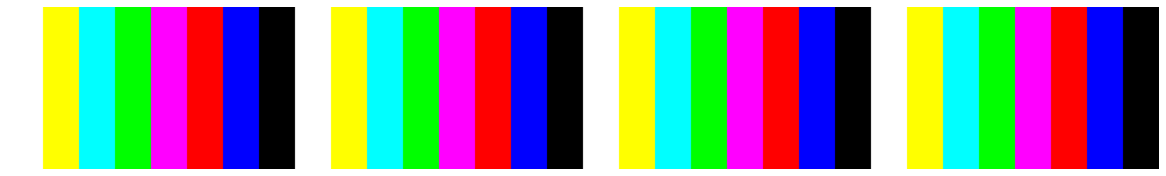

In [3]:
a = raw2rgb(1280, 720, 'BGGR', 8)
b = raw2rgb(1280, 720, 'RGGB', 8)
c = raw2rgb(1280, 720, 'GRBG', 8)
d = raw2rgb(1280, 720, 'GBRG', 8)
s = np.hstack((a, b, c, d))
plt.figure(figsize=(16, 9))
show_image(s)


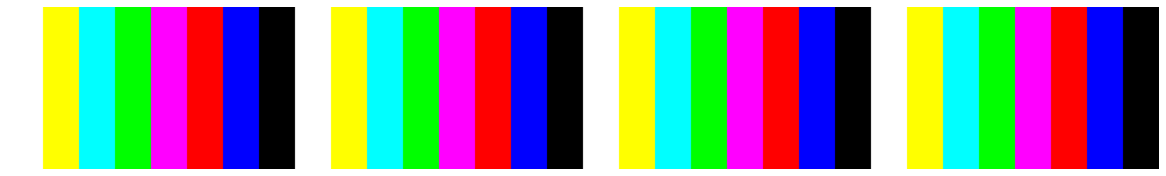

In [4]:
a = raw2rgb(1280, 720, 'BGGR', 10)
b = raw2rgb(1280, 720, 'RGGB', 10)
c = raw2rgb(1280, 720, 'GRBG', 10)
d = raw2rgb(1280, 720, 'GBRG', 10)
s = np.hstack((a, b, c, d))
plt.figure(figsize=(16, 9))
show_image(s)


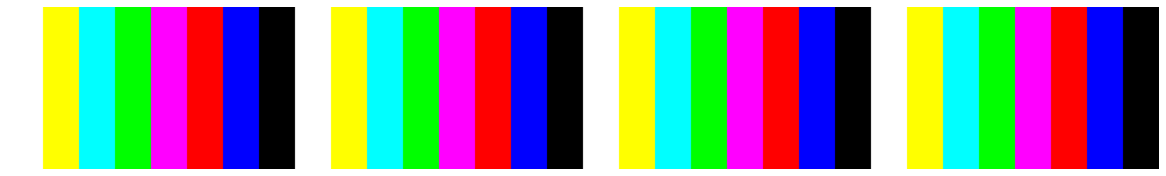

In [5]:
a = raw2rgb(1280, 720, 'BGGR', 12)
b = raw2rgb(1280, 720, 'RGGB', 12)
c = raw2rgb(1280, 720, 'GRBG', 12)
d = raw2rgb(1280, 720, 'GBRG', 12)
s = np.hstack((a, b, c, d))
plt.figure(figsize=(16, 9))
show_image(s)
